### **Code** : **PV Smart-Metering Regression Analysis_Ver.2**
- Writer : Donghyeon Kim
- Date : 2022.08.01
- Data : 태양광 사용가구 '김OO'
- Reason : 1,440개의 행(60분 X 24시간)을 가장 많이 지니고 있는 가구이므로 선정함.

<hr>

### **0. Running the library and setting up the foundation**

In [1]:
# 1. 라이브러리 실행
from pathlib import Path
import os
import pandas as pd
import numpy as np 
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# 2. 파일의 상위-상위 경로 설정
os_root = Path(os.path.join(os.getcwd(), '5.reg_analysis_ver2.ipynb'))
root = os_root.parent.parent

#### **User Data**

In [3]:
# 3. 사용자 데이터 호출
# User data 폴더
user_folder_root = os.path.join(root, 'data_revised_hour')

# xlsx 파일 이름
xlsx_name = user_folder_root + '\\' + '김OO_dataset_revised_hour.xlsx'

# 데이터 호출
df_user = pd.read_excel(xlsx_name)

In [4]:
df_user.head(24)

,date,year,month,day,hour,그리드 소비(kWh),수출 된 에너지(kWh),에너지 수율(kWh)
0,2021-03-01 00:59:00,2021,3,1,0,0.200001,0.000000,0.000000
1,2021-03-01 01:59:00,2021,3,1,1,0.250000,0.000000,0.000000
2,2021-03-01 02:59:00,2021,3,1,2,0.210003,0.000000,0.000000
3,2021-03-01 03:59:00,2021,3,1,3,0.180000,0.000000,0.000000
4,2021-03-01 04:59:00,2021,3,1,4,0.190002,0.000000,0.000000
5,2021-03-01 05:59:00,2021,3,1,5,0.200001,0.000000,0.000000
6,2021-03-01 06:59:00,2021,3,1,6,0.299999,0.000000,0.000000
7,2021-03-01 07:59:00,2021,3,1,7,0.270000,0.000000,0.000000
8,2021-03-01 08:59:00,2021,3,1,8,0.399998,0.000000,0.000000
9,2021-03-01 09:59:00,2021,3,1,9,0.219997,0.000000,0.050003


In [5]:
# Merge를 위한 column filtering
df_user_filter = df_user.drop(['date'], axis = 1)

In [6]:
df_user_filter.head(24)

,year,month,day,hour,그리드 소비(kWh),수출 된 에너지(kWh),에너지 수율(kWh)
0,2021,3,1,0,0.200001,0.000000,0.000000
1,2021,3,1,1,0.250000,0.000000,0.000000
2,2021,3,1,2,0.210003,0.000000,0.000000
3,2021,3,1,3,0.180000,0.000000,0.000000
4,2021,3,1,4,0.190002,0.000000,0.000000
5,2021,3,1,5,0.200001,0.000000,0.000000
6,2021,3,1,6,0.299999,0.000000,0.000000
7,2021,3,1,7,0.270000,0.000000,0.000000
8,2021,3,1,8,0.399998,0.000000,0.000000
9,2021,3,1,9,0.219997,0.000000,0.050003


<hr>

### **1. Data Pre-processing for Regression Analysis**

#### **<Data 1 : Weather Data>**

#### **Data Pre-processing**

In [7]:
# weather data 폴더
weather_folder_root = os.path.join(root, 'data_weather')

# csv 파일 이름
csv_name = weather_folder_root + '\\' + 'keei_ldaps.csv'

# 데이터 호출
df_weather = pd.read_csv(csv_name, encoding='cp949')

In [8]:
# 데이터 정제
df_weather['dt'] = pd.to_datetime(df_weather['dt'], format='%Y/%m/%d %H:%M:%S')
df_weather['year'] = df_weather['dt'].dt.year
df_weather['month'] = df_weather['dt'].dt.month
df_weather['day'] = df_weather['dt'].dt.day
df_weather['hour'] = df_weather['dt'].dt.hour

In [9]:
# 태양광 사용 가구 : '김OO'
df_weather_use = df_weather[df_weather.owner == '김OO']

In [10]:
# Data Merge
df_weather_use = pd.merge(df_weather_use, df_user_filter, how='left', on=['year', 'month', 'day', 'hour'])

In [11]:
# Column 이름 변경
df_weather_use.rename(columns={'그리드 소비(kWh)': 'grid_kWh', '수출 된 에너지(kWh)': 'export_kWh', '에너지 수율(kWh)': 'yield_kWh'}, inplace=True)

In [12]:
df_weather_use.drop(['owner', 'id_hh', 'id_hs'], axis=1).tail(10)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
13840,2022-04-30 15:00:00+09:00,289.807922,1.103254,2.136642,243.770538,0.0,75.599068,0.006213,2022,4,30,15,0.000000,0.370117,0.680176
13841,2022-04-30 16:00:00+09:00,290.679688,3.716064,0.633899,284.969421,0.0,70.625931,0.006306,2022,4,30,16,0.000000,0.319824,0.470215
13842,2022-04-30 17:00:00+09:00,289.007690,3.104170,1.623195,331.664551,0.0,78.621765,0.005859,2022,4,30,17,0.020020,0.130127,0.370117
13843,2022-04-30 18:00:00+09:00,287.392883,2.541556,1.322166,187.572693,0.0,80.893768,0.005859,2022,4,30,18,0.100098,0.070068,0.180176
13844,2022-04-30 19:00:00+09:00,285.536194,1.803355,2.358898,50.007076,0.0,84.606339,0.005744,2022,4,30,19,0.709961,0.000000,0.000000
13845,2022-04-30 20:00:00+09:00,284.207703,1.945932,1.498594,1.366211,0.0,87.228836,0.005584,2022,4,30,20,0.290039,0.000000,0.000000
13846,2022-04-30 21:00:00+09:00,282.821838,0.995493,1.326086,0.000000,0.0,85.965973,0.005168,2022,4,30,21,0.320068,0.000000,0.000000
13847,2022-04-30 22:00:00+09:00,281.902527,0.671311,1.957892,0.000000,0.0,83.123375,0.005127,2022,4,30,22,0.260010,0.000000,0.000000
13848,2022-04-30 23:00:00+09:00,281.104187,0.343318,2.047524,0.000000,0.0,80.482849,0.004883,2022,4,30,23,0.209961,0.000000,0.000000
13849,2022-05-01 00:00:00+09:00,280.501892,0.750398,1.590288,0.000000,0.0,77.866310,0.004686,2022,5,1,0,NaN,NaN,NaN


In [13]:
# 데이터에 해당하는 연도 / 21년도에 해당하는 월 / 22년도에 해당하는 월
# 데이터 기간 : 2021.03 ~ 2022.04
d_year = [2021, 2022]
d_month_21 = range(3, 12+1)
d_month_22 = range(1, 4+1)

In [14]:
# 2021.03 ~ 2022.04 기간에 해당하는 데이터만 필터링
for y in d_year:
    count = 0
    if y == 2021:
        for ma in d_month_21:
            temp = df_weather_use[(df_weather_use.year == y) & (df_weather_use.month == ma)]
            if count == 0:
                result = temp
                count += 1
            else:
                result = pd.concat([result, temp])
    elif y == 2022:
        for mb in d_month_22:
            temp = df_weather_use[(df_weather_use.year == y) & (df_weather_use.month == mb)]
            result = pd.concat([result, temp])

df_weather_use = result

In [15]:
# 온도(temperature) 변환
# 기존 형태 : Kelvin(켈빈 온도) -> 변경하고자 하는 형태 : 섭씨 온도
# 섭씨 온도와 켈빈 온도 관계식 : 0(C) + 273.15(K) = 273.15(K)

df_weather_use.temperature = df_weather_use.temperature - 273.15

In [16]:
df_weather_use.drop(['owner', 'id_hh', 'id_hs'], axis=1).head(24)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
3625,2021-03-01 00:00:00+09:00,10.322687,0.858208,0.041718,0.000000,0.000000,60.644928,0.004421,2021,3,1,0,0.200001,0.000000,0.000000
3626,2021-03-01 01:00:00+09:00,10.029108,0.135828,-1.085083,0.000000,0.000000,56.432068,0.004188,2021,3,1,1,0.250000,0.000000,0.000000
3627,2021-03-01 02:00:00+09:00,9.844873,0.362611,-0.180941,0.000000,0.000000,62.081512,0.004626,2021,3,1,2,0.210003,0.000000,0.000000
3628,2021-03-01 03:00:00+09:00,9.587915,-0.411156,0.997797,0.000000,0.000000,56.335152,0.004261,2021,3,1,3,0.180000,0.000000,0.000000
3629,2021-03-01 04:00:00+09:00,9.564752,-0.462263,-0.222837,0.000000,0.000000,61.451012,0.004599,2021,3,1,4,0.190002,0.000000,0.000000
3630,2021-03-01 05:00:00+09:00,9.363092,0.721948,-2.010242,0.000000,0.000000,64.313083,0.004559,2021,3,1,5,0.200001,0.000000,0.000000
3631,2021-03-01 06:00:00+09:00,8.639551,-1.163785,-1.346743,0.000000,2.439514,92.884331,0.005859,2021,3,1,6,0.299999,0.000000,0.000000
3632,2021-03-01 07:00:00+09:00,8.481317,-0.673493,-1.971651,0.000000,1.226685,94.962051,0.006039,2021,3,1,7,0.270000,0.000000,0.000000
3633,2021-03-01 08:00:00+09:00,8.494592,-1.207814,-0.468723,3.883789,1.170898,93.874001,0.005951,2021,3,1,8,0.399998,0.000000,0.000000
3634,2021-03-01 09:00:00+09:00,8.613031,-5.542665,1.533955,18.028790,0.239624,88.038452,0.005981,2021,3,1,9,0.219997,0.000000,0.050003


<hr>

#### **<Data 2 : Visibility Data>**

#### **Data Pre-processing**

In [17]:
# ASOS data 폴더
asos_folder_root = os.path.join(root, 'data_ASOS')

# csv 파일 이름
csv_file_name = ['OBS_ASOS_TIM_1.csv', 'OBS_ASOS_TIM_2.csv']

# 데이터 호출
for i in range(len(csv_file_name)):
    csv_name = asos_folder_root + '\\' + csv_file_name[i]
    if i == 0:
        df_asos = pd.read_csv(csv_name, encoding='cp949')
    else:
        temp = pd.read_csv(csv_name, encoding='cp949')
        df_asos = pd.concat([df_asos, temp])

In [18]:
df_asos['일시'] = pd.to_datetime(df_asos['일시'], format='%Y/%m/%d %H:%M:%S')
df_asos['year'] = df_asos['일시'].dt.year
df_asos['month'] = df_asos['일시'].dt.month
df_asos['day'] = df_asos['일시'].dt.day
df_asos['hour'] = df_asos['일시'].dt.hour

In [19]:
df_asos.head(10)

,지점,지점명,일시,시정(10m),year,month,day,hour
0,90,속초,2021-03-01 00:00:00,2000,2021,3,1,0
1,90,속초,2021-03-01 01:00:00,2000,2021,3,1,1
2,90,속초,2021-03-01 02:00:00,2000,2021,3,1,2
3,90,속초,2021-03-01 03:00:00,1951,2021,3,1,3
4,90,속초,2021-03-01 04:00:00,1877,2021,3,1,4
5,90,속초,2021-03-01 05:00:00,1630,2021,3,1,5
6,90,속초,2021-03-01 06:00:00,713,2021,3,1,6
7,90,속초,2021-03-01 07:00:00,794,2021,3,1,7
8,90,속초,2021-03-01 08:00:00,716,2021,3,1,8
9,90,속초,2021-03-01 09:00:00,906,2021,3,1,9


In [20]:
# 지점명 체크
df_asos['지점명'].unique()

array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '홍성', '제주', '고산',
       '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '정선군', '제천',
       '보은', '천안', '보령', '부여', '금산', '세종', '부안', '임실', '정읍', '남원', '장수',
       '고창군', '영광군', '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '장흥', '해남',
       '고흥', '의령군', '함양군', '광양시', '진도군', '봉화', '영주', '문경', '청송군', '영덕',
       '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해'],
      dtype=object)

In [21]:
# '김OO' 가구 위치는 '서울'이므로 해당 지역으로 필터링
df_asos_filter = df_asos[df_asos['지점명'] == '서울']

In [22]:
# Data Merge
df_asos_filter = pd.merge(df_asos_filter, df_user_filter, how='left', on=['year', 'month', 'day', 'hour'])

In [23]:
# Column 이름 변경
df_asos_filter.rename(columns={'그리드 소비(kWh)': 'grid_kWh', '수출 된 에너지(kWh)': 'export_kWh',
                               '에너지 수율(kWh)': 'yield_kWh', '시정(10m)': 'visibility', '지점명': 'place'}, inplace=True)

In [24]:
df_asos_filter = df_asos_filter.drop(['지점', '일시'], axis = 1)

In [25]:
df_asos_filter.head(24)

,place,visibility,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
0,서울,2000,2021,3,1,0,0.200001,0.000000,0.000000
1,서울,2000,2021,3,1,1,0.250000,0.000000,0.000000
2,서울,2000,2021,3,1,2,0.210003,0.000000,0.000000
3,서울,2000,2021,3,1,3,0.180000,0.000000,0.000000
4,서울,447,2021,3,1,4,0.190002,0.000000,0.000000
5,서울,1303,2021,3,1,5,0.200001,0.000000,0.000000
6,서울,587,2021,3,1,6,0.299999,0.000000,0.000000
7,서울,381,2021,3,1,7,0.270000,0.000000,0.000000
8,서울,381,2021,3,1,8,0.399998,0.000000,0.000000
9,서울,294,2021,3,1,9,0.219997,0.000000,0.050003


<hr>

### **2. Regression Analysis**

#### **1) Creating Data & Pre-processing**

In [26]:
# 회귀분석 진행을 위한 데이터 생성
reg_data = pd.merge(df_weather_use, df_asos_filter, how='left', on=['year', 'month', 'day', 'hour', 'grid_kWh', 'export_kWh', 'yield_kWh'])

In [27]:
reg_data = reg_data.drop(['owner', 'id_hh', 'id_hs'], axis = 1)

In [28]:
reg_data.head(10)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,year,month,day,hour,grid_kWh,export_kWh,yield_kWh,place,visibility
0,2021-03-01 00:00:00+09:00,10.322687,0.858208,0.041718,0.000000,0.000000,60.644928,0.004421,2021,3,1,0,0.200001,0.0,0.000000,서울,2000
1,2021-03-01 01:00:00+09:00,10.029108,0.135828,-1.085083,0.000000,0.000000,56.432068,0.004188,2021,3,1,1,0.250000,0.0,0.000000,서울,2000
2,2021-03-01 02:00:00+09:00,9.844873,0.362611,-0.180941,0.000000,0.000000,62.081512,0.004626,2021,3,1,2,0.210003,0.0,0.000000,서울,2000
3,2021-03-01 03:00:00+09:00,9.587915,-0.411156,0.997797,0.000000,0.000000,56.335152,0.004261,2021,3,1,3,0.180000,0.0,0.000000,서울,2000
4,2021-03-01 04:00:00+09:00,9.564752,-0.462263,-0.222837,0.000000,0.000000,61.451012,0.004599,2021,3,1,4,0.190002,0.0,0.000000,서울,447
5,2021-03-01 05:00:00+09:00,9.363092,0.721948,-2.010242,0.000000,0.000000,64.313083,0.004559,2021,3,1,5,0.200001,0.0,0.000000,서울,1303
6,2021-03-01 06:00:00+09:00,8.639551,-1.163785,-1.346743,0.000000,2.439514,92.884331,0.005859,2021,3,1,6,0.299999,0.0,0.000000,서울,587
7,2021-03-01 07:00:00+09:00,8.481317,-0.673493,-1.971651,0.000000,1.226685,94.962051,0.006039,2021,3,1,7,0.270000,0.0,0.000000,서울,381
8,2021-03-01 08:00:00+09:00,8.494592,-1.207814,-0.468723,3.883789,1.170898,93.874001,0.005951,2021,3,1,8,0.399998,0.0,0.000000,서울,381
9,2021-03-01 09:00:00+09:00,8.613031,-5.542665,1.533955,18.028790,0.239624,88.038452,0.005981,2021,3,1,9,0.219997,0.0,0.050003,서울,294


#### **2) Checking the correlation between variables**

In [29]:
# 시각화를 위한 필요한 변수만 남기고, 나머지 변수는 제거하기

# 제거한 변수 #
# dt : 날짜
# year : 연도
# month : 월
# day : 일
# hour : 시간
# place : 시정 측정한 위치

# uws_10m : x축 풍속
# vws_10m : y축 풍속
# precipitation : 강수량
# relative_humidity_1p5m : 상대습도
# specific_humidity_1p5m : 절대습도
# grid_kWh : 그리드 소비(kWh)
# export_kWh : 수출 된 에너지(kWh)
# yield_kWh : 에너지 수율(kWh)

reg_data_vis = reg_data.drop(['dt', 'year', 'month', 'day', 'hour', 'place',
                              'uws_10m', 'vws_10m', 'precipitation', 'relative_humidity_1p5m', 'specific_humidity_1p5m',
                              'grid_kWh', 'export_kWh', 'yield_kWh'], axis=1)

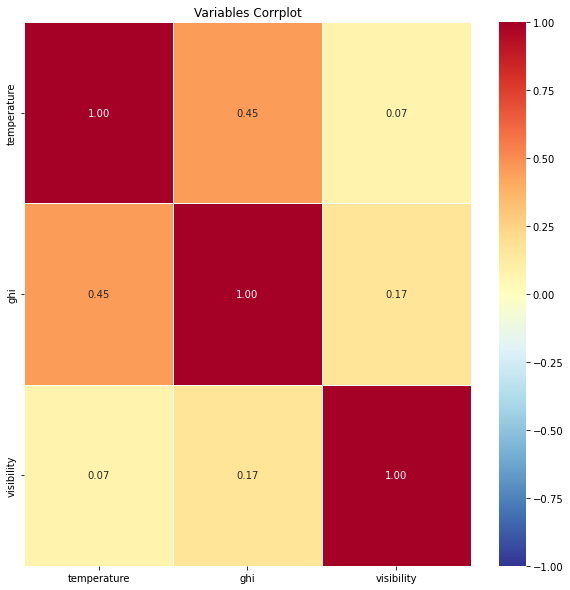

In [30]:
# Heatmap Options
# annot=True : 실제 값 표시하기
# linewidths : 경계면 실선으로 구분하기
# cmap : 컬러 설정하기
# vmin, vmax : 컬러바 범위 설정하기
plt.figure(figsize=(10, 10))
sns.heatmap(data=reg_data_vis.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='RdYlBu_r', vmin=-1, vmax=1)
plt.title("Variables Corrplot")
plt.show()

<hr>

#### **Case 3 : 에너지 수율(kWh)**
- 참고 : Case 1(그리드 소비(kWh)), Case 2(수출 된 에너지(kWh))는 생략.

#### Package 1 : Scikit-learn

#### (1) Training & Test Set Split from data other than NA

In [31]:
x = reg_data.dropna(axis=0)[['temperature','ghi', 'visibility']]
y = reg_data.dropna(axis=0)[['yield_kWh']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

#### (2) Modeling

In [32]:
# Initialization
lin_reg = linear_model.LinearRegression(fit_intercept=True)

In [33]:
# Fitting
lin_reg_model = lin_reg.fit(x_train, y_train)

In [34]:
# Predicting(Estimated values)
y_predict = lin_reg_model.predict(x_test)
print(y_predict)

[[-0.06527816]
 [ 0.66778567]
 [ 0.66714228]
 ...
 [-0.03245564]
 [ 2.04798468]
 [ 1.48764911]]


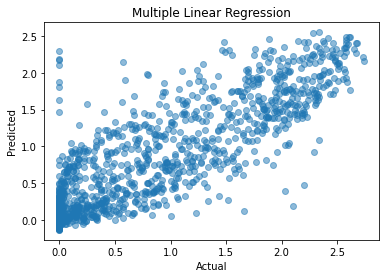

In [35]:
# Visualization confirmation
plt.scatter(y_test, y_predict, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()

#### (3) Checking coefficients and constants

In [36]:
print(lin_reg_model.coef_)

[[-7.67576723e-03  3.16108789e-03  1.09071253e-05]]


#### (4) Accuracy Test

In [37]:
# R-Squared
print(lin_reg_model.score(x_train, y_train))

0.787755165513696


#### Package 2 : Statsmodels

#### (1) Checking fitting results
- F-statistic : 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악
- P-value : 각 변수가 종속변수에 미치는 영향이 유의한지 파악
- Adjusted R-square : 회귀직선이 종속변수의 몇 %를 설명할 수 있는지 확인

In [38]:
x_train_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_const)
results = model.fit()

In [39]:
# 결과값 요약 확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              yield_kWh   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 1.007e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:14:06   Log-Likelihood:                -2927.9
No. Observations:                8147   AIC:                             5864.
Df Residuals:                    8143   BIC:                             5892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0934      0.014      6.586      0.000       0.066       0.121
temperature    -0.0077      0.000    -20.811      0.000      -0.008      -0.007
ghi             0.0032   1.96e-05    161.306      0.000       0.003       0.003
visibility   1.091e-05   7.66e-06      1.425      0.154    -4.1e-06    2.59e-05
==============================================================================
Omnibus:                      946.225   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9535.224
Skew:                          -0.067   Prob(JB):                         0.00
Kurtosis:                       8.298   Cond. No.                     6.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **결과 해석**
**1. F-statistic**
- F-statistic의 P-value는 Prob(F-statistic)으로 표현된다.
- F-statistic의 P-value = 0.00으로, 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

**2. Coefficients and P-value of variables**
- 전반적으로 유의미하다고 판단된다(P-value <= 0.05 기준 적용).
- 단, visibility 변수는 P-value = 0.154로, 0.05보다 크기에 유의하지 않다.

**3. Adjusted R-Squared**
- Adjusted R-Squared = 0.788로, 78.8%만큼의 설명력을 가진다고 할 수 있다.

**4. Notes**
> [2] The condition number is large, 6.67e+03. This might indicate that there are strong multicollinearity or other numerical problems.
- 위 문구를 통해, Numerical Problems가 존재한다는 사실을 확인할 수 있다.

In [40]:
# VIF(분산 팽창 인수)
for i in range(1, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)
    print(f'Variable: {model.exog_names[i]}, VIF: {vif.round(2)}')

Variable: temperature, VIF: 1.26
Variable: ghi, VIF: 1.29
Variable: visibility, VIF: 1.03


#### **결과 해석**
**Variance Inflation Factor(VIF)**
- Intercept을 제외한 나머지 변수들에 각각 변수명과 VIF를 출력하였다.
- ghi(일사량) 변수의 VIF가 1.29로 가장 높은 것을 확인할 수 있다.
- 하지만, 매우 큰 값을 가지진 않으므로, 크게 문제되진 않을 수준의 Multicollinearity(다중공선성)으로 보여진다.
- 앞서 Notes [2]에 언급된 것을 고려했을 때, 데이터 수치의 문제임을 확인할 수 있다.

#### (2) Checking residuals
- 회귀모형에 대한 가정(정규성, 등분산성, 독립성)을 충족하는지에 대한 검정
- 이상치가 개입하는지에 대한 검정을 하는 절차

##### (2-1) Linearity of the model
- 예측값(y_predict)과 잔차(residuals)의 비교
- 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선).
- 빨간 실선은 잔차의 추세를 나타냄.
- 빨간 실선이 점선을 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


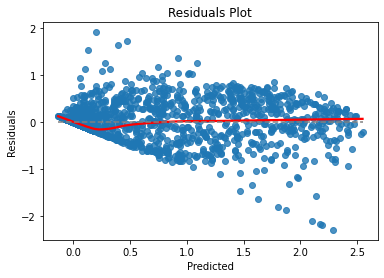

In [41]:
residuals = y_test - y_predict

sns.regplot(y_predict, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

##### (2-2) Normality of residuals
- 잔차가 정규분포를 따른다는 가정
- Shapiro Test를 통해 확인할 수 있음.

In [42]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9040343761444092, pvalue=5.670263324130162e-34)

##### (2-3) Equivariance of residuals
- 회귀모형을 통해 예측된 값이 크던 작던, 모든 값을에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌.
- 빨간색 실선이 수평선을 그리는 것이 이상적임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


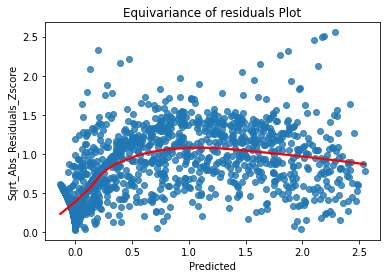

In [43]:
sr = scipy.stats.zscore(residuals)
sns.regplot(y_predict, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Equivariance of residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Sqrt_Abs_Residuals_Zscore")
plt.show()

<hr>

#### **3. Conclusion**

**1. Estimated results**
- 지난번 모든 변수를 활용하여 회귀분석을 시행한 결과와 비교하였을 때, 설명력 부분에 있어서는 본 분석이 2% 정도 떨어지지만 큰 차이를 보이고 있진 않다.
- 즉, 지난번에 언급한 'x축 풍속', 'y축 풍속', '상대 습도', '절대 습도' 등은 큰 의미를 지닌 변수가 아닌 것을 알 수 있다.
- 시정(visibility) 변수의 P-value가 다소 높아 유의하지 않다고 나오긴 하였다는 점과 예측값과 실제값의 차이가 다소 큰 점이 있다는 점을 고려했을 때, 추가 보완이 더 필요할 것으로 보인다.

**2. Discussion**
- '수출 된 에너지(kWh)' : 위 '에너지 수율(kWh)'와 비슷한 양상을 보이고 있으므로 추정하는 데에는 큰 문제가 없을 것으로 보인다.
- '그리드 소비(kWh)' : 방법 논의 필요.
- '그리드 소비(kWh)'는 회귀분석을 사용할 수 있는 데이터 형태를 띠고 있지 않기에, 어떤 모델을 사용해야할지 생각해야한다.